In [1]:
import sys
import os
import pathlib
from pathlib import Path
from typing import Tuple

from typeguard import typechecked

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
NOISE_PATH = Path("/Users/dean/projects/kaggle-gw/noise.npy")

In [3]:
kaggle_gw_dir = str(pathlib.Path(os.getcwd(), '..').resolve())
sys.path.insert(0, kaggle_gw_dir)

In [24]:
import gw_data
import gw_processing

In [5]:
# Suitable for a 2020ish MacBook Pro
plt.rcParams['figure.dpi']= 140

SMALL_FONT_SIZE = 6
MEDIUM_FONT_SIZE = 8
BIGGER_FONT_SIZE = 10

plt.rc('font', size=SMALL_FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT_SIZE)  # fontsize of the figure title

In [30]:
SIGNAL_COLORS = ['red', 'green', 'blue']

def plot_line(ax, x, ys, idx):
    ax.minorticks_on()
    ax.grid(which='major', color='#555555', linestyle='-', linewidth=0.7)
    ax.grid(which='minor', color='#AAAAAA', linestyle=':', linewidth=0.5)
    ax.set_axisbelow(False)

    ax.plot(x, ys[idx], SIGNAL_COLORS[idx])
    
def plot_lines(title, x, ys):
    fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=[6, 6])
    for i in range(3):
        plot_line(axs[i], x, ys, i)
    fig.suptitle(title)
    plt.show()

In [31]:
# Reproduce the FrequencySeries creation process to get the frequency axis, given defaults.
SAMPLE_SOURCE_DIR = Path("../g2net-data-000")
rows = np.loadtxt(str(gw_data.training_labels_file(SAMPLE_SOURCE_DIR)), delimiter=",", dtype=str)
example_id = rows[1][0]
example_sigs = np.load(str(gw_data.train_file(SAMPLE_SOURCE_DIR, example_id)))
example_ts = gw_processing.timeseries_from_signal(example_sigs[0])
fs = example_ts.to_frequencyseries()

sample_frequencies = fs.sample_frequencies

In [32]:
noise = np.load(str(NOISE_PATH))
noise.shape

(3, 2049)

In [39]:
X_SPLIT = 50

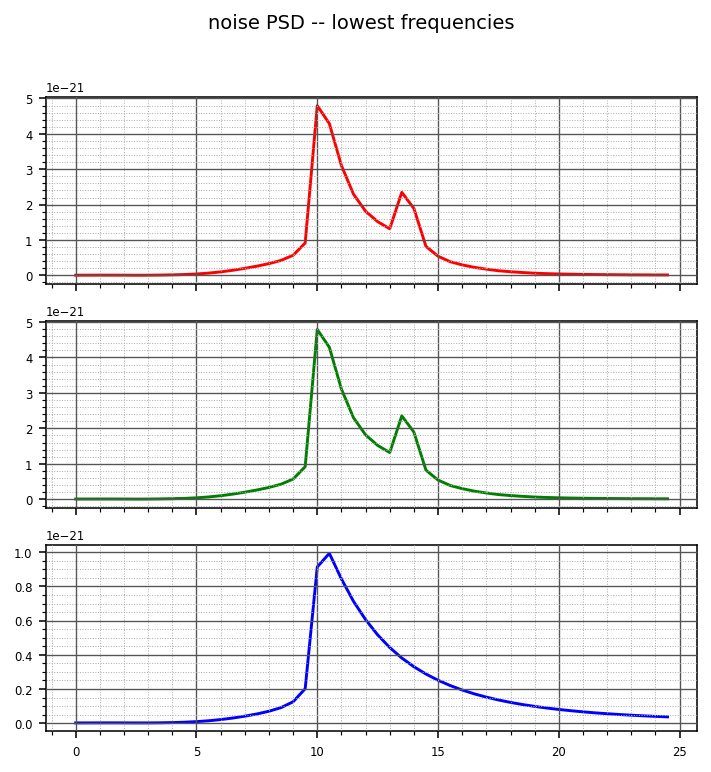

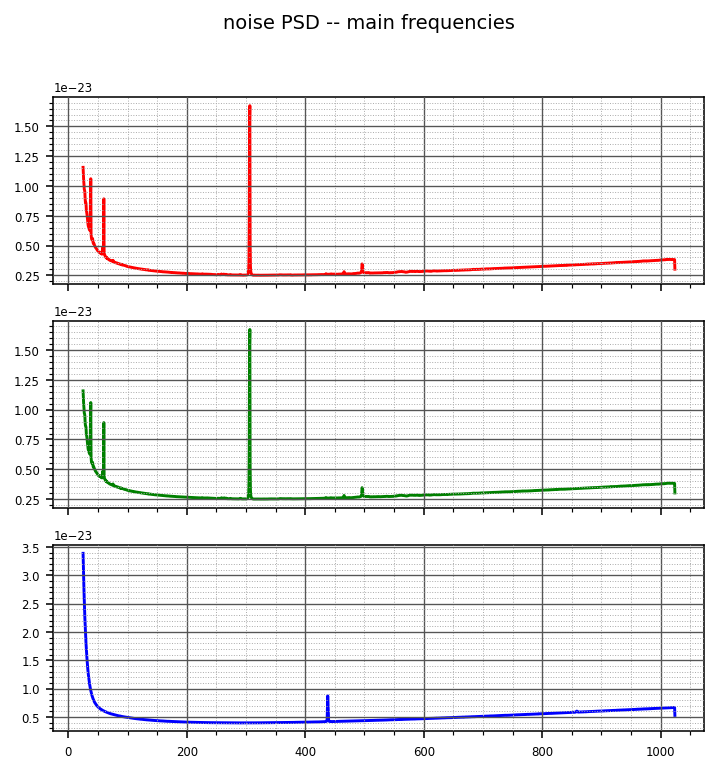

In [40]:
plot_lines("noise PSD -- lowest frequencies", sample_frequencies[0:X_SPLIT], noise[:, 0:X_SPLIT])
plot_lines("noise PSD -- main frequencies", sample_frequencies[X_SPLIT:], noise[:, X_SPLIT:])
